<a href="https://colab.research.google.com/github/avinashmane/colab/blob/master/1.1_strava_likers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup Code/Parameters
* Setup
    * needs
        * auth
        * gsheet auth
        * cfg_strava
* updates sheets
* Todo
    * low: error: location not found 

## Config

In [1]:
repo='https://github.com/avinashmane/colab.git'
CONFIG_FILE='config.yaml'


#clone report for colab
import yaml,os,sys

#setup directories
if os.name=='nt':
    pass
else:               #colab setup below
    if not os.path.exists('./repo') :
        !git clone $repo repo
        sys.path.append("repo/lib")
        sys.path.append('repo')       
    !apt update
    if not os.path.exists('drive'):
        from google.colab import drive
        drive.mount('/content/drive')
    if not os.path.exists('m'):
      !ln -sd '/content/drive/MyDrive/m/' m
    
sys.path.append('lib')
# sys.path.append(LIB)

import utils
cfg=utils.setup_env(CONFIG_FILE)  #auth_file defaulted from {AUTH}/auth/yaml

for x in cfg['env'][os.name]: 
    # os.environ[x]=cfg['env'][os.name][x]
    globals()[x]=cfg['env'][os.name][x]

#need to use following for each sheet
service_account_file=f'{os.environ["AUTH"]}/{cfg["AUTH"]["service_accounts"]["indiathon"]}'

## Code

In [2]:
import yaml
from datetime import datetime
import os
from nerodia.browser import Browser
import nerodia
import re
import logging
from IPython.display import Image, Markdown
import pandas as pd

import utils
import importlib
importlib.reload(utils)

import socialmediasite 
importlib.reload(socialmediasite)
Strava=socialmediasite.Strava
SocialMediaSite=socialmediasite.SocialMediaSite


In [3]:
"reach gsheet"

import gsheets
Gsheet=gsheets.Gsheet


# Process
## Create headless

In [4]:
" Test Selenium headless"

if True:
    import json
    env_var="BROWSER_SESSIONS"
    if os.name=='nt':
        b=Browser('chrome')
    else:

        from selenium import webdriver

        chrome_options = webdriver.ChromeOptions()
        chrome_options.add_argument('--headless')
        chrome_options.add_argument('--no-sandbox')
        chrome_options.add_argument('--disable-dev-shm-usage')
        # b =webdriver.Chrome('chromedriver',options=chrome_options)
        b=Browser('chrome',options=chrome_options,)
    
    utils.setLogger(f"{LOG}/strava-automation.log")
    

2022-09-25 21:03:06:INFO:Logger file: c:/m/logging/strava-automation.log


In [5]:

strava=Strava(b,                                                 #authFile=f'{AUTH}/auth.yaml',
              cfg=cfg,
              delay=.5)

df_mc=Gsheet(cfg['sheets']['stravasync']['url'],service_account_file=service_account_file
            ).getSheetDf(cfg['sheets']['stravasync']['tab'],start='A10')
promoSheet=Gsheet(cfg['sheets']['StravaPromoLog']['url'],service_account_file=service_account_file)
strava.logGSheet = promoSheet.getSheetByTitle('StravaPromoLog') 
strava.promoCommentLog = promoSheet.getSheetByTitle('PromoCommentLog')
sessionGSheet = promoSheet.getSheetByTitle('SessionLog')

strava.promoCommentedIds=list(strava.promoCommentLog.get_as_df().id.values)
strava.StravaMembers=df_mc.query('strava=="strava"').id.values

%env COUNTER_PROMO_COMMENT 0

env: COUNTER_PROMO_COMMENT=0


# A. Mileage Certificates

In [6]:
strava.login("mileage_league_strava")

In [7]:
certSheet=Gsheet(cfg['sheets']['certs']['url'],service_account_file=service_account_file)
certTab=certSheet.getSheetByTitle(cfg['sheets']['certs']['tab'])
df_cert=certTab.get_as_df().query("comment_text!='' and Activity==''"
                                   ).reset_index()
cols={x:df_cert.columns.get_loc(x)+1 for x in ['comment_ts','comment_text']}
# display(cols)
# merge
_df=df_cert.merge(df_mc[['Email','profile','strava']],on='Email')

c:\sw\python37\lib\site-packages\pygsheets\worksheet.py:1477: UserWarning: At least one column name in the data frame is an empty string. If this is a concern, please specify include_tailing_empty=False and/or ensure that each column containing data has a name.
  warnings.warn('At least one column name in the data frame is an empty string. If this is a concern, please specify include_tailing_empty=False and/or ensure that each column containing data has a name.')


In [8]:
_df['index 	CertType 	Email 	Milestone 	Name 	Date 	ID 	Team	comment_ts 	Activity 		profile 	strava'.split()]

,index,CertType,Email,Milestone,Name,Date,ID,Team,comment_ts,Activity,profile,strava
0,1373,WalkDist,umesh.divekar777@gmail.com,500,Umesh,9/20/2022,1H4nFtV4ptD4bYsiMuowoUMasXylDg9Ti,A,,,https://runkeeper.com/user/2459972584,runkeeper
1,1405,RunDist,mprasannapriya@gmail.com,1500,Prasanna Priya,9/25/2022,1YKr6u9MrMiWtKYvLjj-8JY9W-ozRDQVT,A,,,https://www.strava.com/athletes/27994749,strava
2,1406,RunDist,anil.bhat77@yahoo.com,2000,Anil Bhat,9/25/2022,1gRfE9fn3Rj5tNa6mps24o0-w6o3JBdyr,A,,,,strava
3,1407,RunDays,yogesh.gundewar@gmail.com,100,Yogesh Gundewar,9/25/2022,1Bxm5NPZsG1F_niNE9pE2bioQwmGJIHD0,A,,,,strava
4,1408,RunDist,sumitra1973@gmail.com,2500,Sumitra Joshi,9/25/2022,14R0KERaQkj6txO-95DBjjkngwDNzTs2I,A,,,https://www.strava.com/athletes/12483974,strava
5,1409,RunDays,gauravbajaj4@gmail.com,150,Gaurav Bajaj,9/25/2022,18yWR2tcodhNNx3fo427DV7tg-3KjRJFs,A,,,https://www.strava.com/athletes/45641401,strava
6,1410,CyclingDist,gunvantkute@gmail.com,1000,Gunvant लोहपुरुष#IAS,9/25/2022,1Od0plinaw7BvIYseOmspF3bJ7bckbDAj,A,,,,strava
7,1412,RunDays,nandan.kamat@gmail.com,50,Nandan Kamat,9/25/2022,1GtnplEvUJlWaAF8JV8drcevaBg9JvQZc,A,,,https://www.strava.com/athletes/27338904,strava
8,1413,RunDist,pravin198425@gmail.com,1000,Patil Pravin,9/25/2022,1wth9flEJOCo2n8VOsUrj4h9BFmi9ZTVC,A,,,,strava
9,1414,RunDays,ossaini@gmail.com,50,Onkar Singh Saini,9/25/2022,1RFMs3MXsd2xZwIl0SJ9V_9NwVxWb1Qfw,A,,,https://www.strava.com/athletes/48905493,strava


In [9]:
if True:
    from pprint import pprint as pp

    for i,cert in _df.query("strava=='strava'").iterrows():
        # print (cert['index'],cert.profile,cert.comment_text)
        remark=''
        try:

            if not cert.profile: 
                logging.warning(f"{cert.Row},{cert.Name},{cert.profile} : {cert['index']} no profle")
                remark='No profile'
                continue
            b.goto(cert.profile)
            # url=f"https://www.strava.com/activities/{x['activity_id']}"
            if True:
                commentEl=b.button(data_testid="comment_button")
                strava.postComment(commentEl,cert.comment_text)
                logging.info(f"{cert.Row},{cert.Name},{cert.profile} :{cert.comment_text}")

                # break
        except Exception as e:
            logging.error(f"{cert.Row},{cert.Name},{cert.profile} : {e!r} ")
            # raise Exception("Something went wrong while posting comment")
            continue
        finally:
            certTab.update_values(crange=(cert.Row,cols['comment_ts']),
                             values=[[pd.Timestamp.now().isoformat(),cert.profile]])


2022-09-25 21:03:52:INFO:1407,Prasanna Priya,https://www.strava.com/athletes/27994749 :Congratulations on completion of 1500 kms of running this year. Share certificate @ https://drive.google.com/file/d/1YKr6u9MrMiWtKYvLjj-8JY9W-ozRDQVT/view . Check your info at https://pcmcrunners.in/#/profile
2022-09-25 21:03:53:WARNING:1408,Anil Bhat, : 1406 no profle
2022-09-25 21:03:54:WARNING:1409,Yogesh Gundewar, : 1407 no profle
2022-09-25 21:04:08:INFO:1410,Sumitra Joshi,https://www.strava.com/athletes/12483974 :Congratulations on completion of 2500 kms of running this year. Share certificate @ https://drive.google.com/file/d/14R0KERaQkj6txO-95DBjjkngwDNzTs2I/view . Check your info at https://pcmcrunners.in/#/profile
2022-09-25 21:04:20:INFO:1411,Gaurav Bajaj,https://www.strava.com/athletes/45641401 :Congratulations on completion of 150 days of running this year. Share certificate @ https://drive.google.com/file/d/18yWR2tcodhNNx3fo427DV7tg-3KjRJFs/view . Check your info at https://pcmcrunners.

# B. Give likes on Club

### avinash Feed Likes

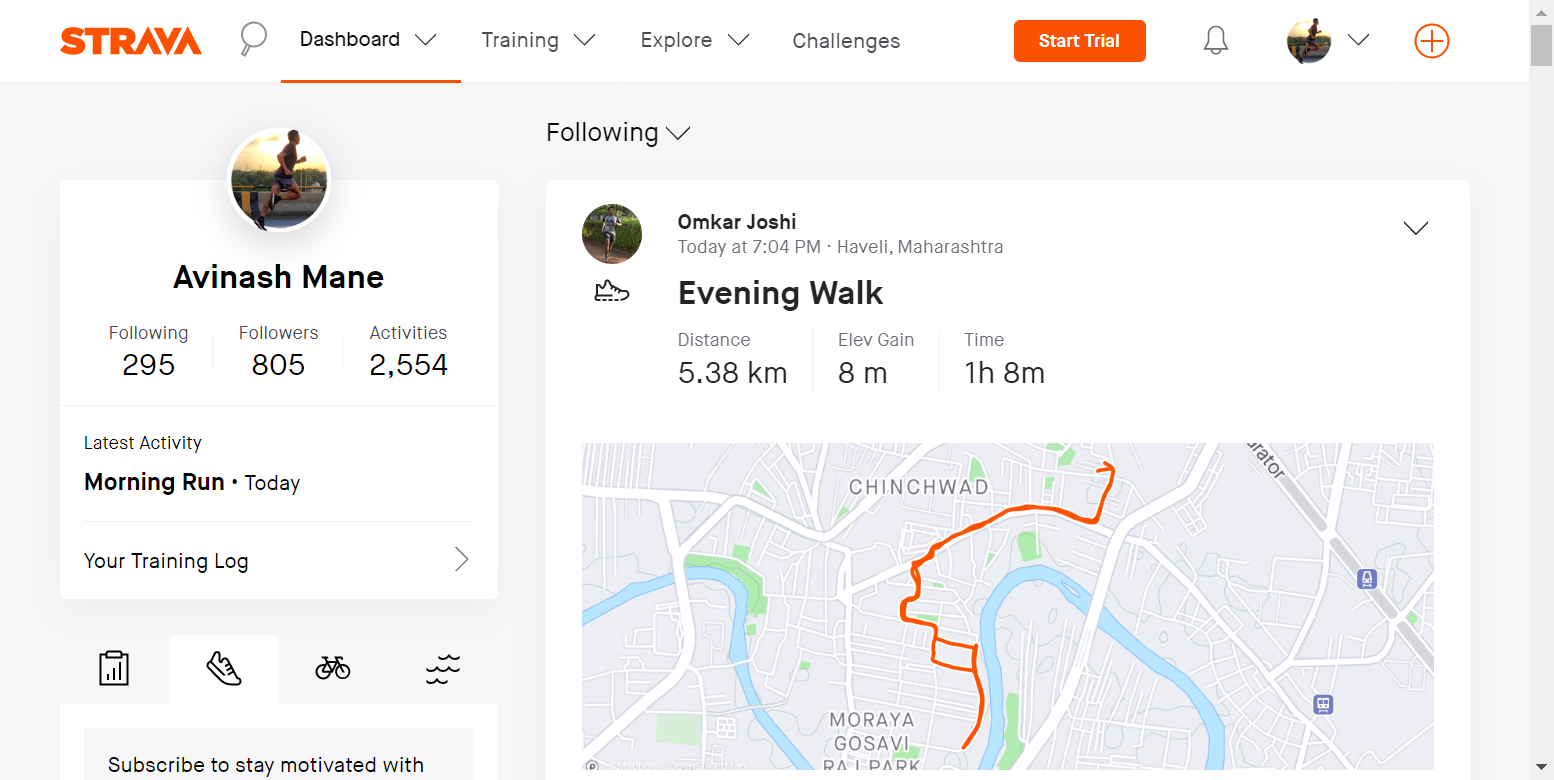

2022-09-25 21:25:46:INFO:Total number of cards on avinash/Dashboard | Strava: 39
2022-09-25 21:25:46:INFO:Stats: {'tot_kudos': 0, 'kudos': 0}


###  avinash https://www.strava.com/clubs/delhirunnersgroup Club Likes

2022-09-25 21:25:56:INFO:Total number of cards on https://www.strava.com/clubs/delhirunnersgroup 'New Delhi, Delhi, India Club | DRG Delhi Runners Group on Strava': 20


2022-09-25 21:27:11:INFO:Stats: {'tot_kudos': 20, 'kudos': 20, 'NoLoc': 20}
2022-09-25 21:27:17:INFO:Logged out


### mileage_league_strava Feed Likes

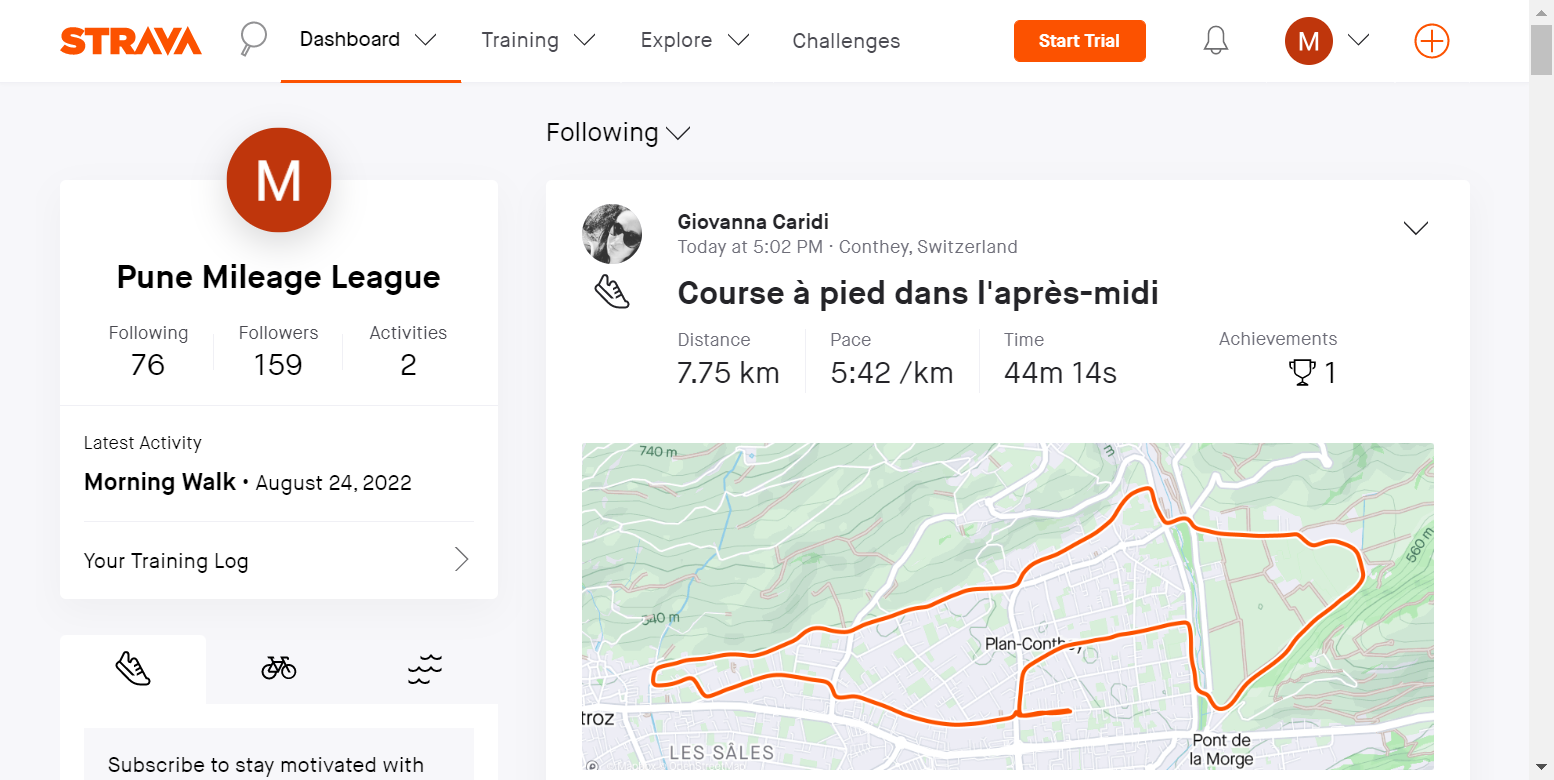

2022-09-25 21:27:41:INFO:Total number of cards on mileage_league_strava/Dashboard | Strava: 39


calling... https://www.strava.com/activities/7862719504


2022-09-25 21:27:54:INFO:Skipping [18.75, 73.65],POINT (74.04986816458404 18.488795896992087),[18.58, 73.87]


calling... https://www.strava.com/activities/7864227547


2022-09-25 21:28:17:INFO:Skipping [18.75, 73.65],POINT (73.78543806262314 18.60599217005074),[18.58, 73.87]


calling... https://www.strava.com/activities/7865863341


2022-09-25 21:28:35:INFO:Skipping [18.75, 73.65],POINT (73.77720879390836 18.6540943197906),[18.58, 73.87]


2022-09-25 21:28:49:INFO:Stats: {'tot_kudos': 12, 'kudos': 12, 'NoLoc': 9, '?': 3}


###  mileage_league_strava https://www.strava.com/clubs/mileageleague Club Likes

2022-09-25 21:28:55:INFO:Total number of cards on https://www.strava.com/clubs/mileageleague 'Atlanta, Georgia Club | Mileage League: 2022 in 2022 on Strava': 20
2022-09-25 21:28:56:INFO:Stats: {'tot_kudos': 0, 'kudos': 0}


###  mileage_league_strava https://www.strava.com/clubs/pcmcrunners Club Likes

2022-09-25 21:29:03:INFO:Total number of cards on https://www.strava.com/clubs/pcmcrunners 'Pimpri-Chinchwad, Maharashtra, India Club | PCMCRunners on Strava': 20


calling... https://www.strava.com/activities/7865578856


2022-09-25 21:29:42:INFO:Skipping [18.75, 73.65],POINT (73.77811789512634 18.64853309467435),[18.58, 73.87]


calling... https://www.strava.com/activities/7865448086


2022-09-25 21:29:57:INFO:Skipping [18.75, 73.65],POINT (73.79974563606083 18.59348276630044),[18.58, 73.87]


calling... https://www.strava.com/activities/7865371814


2022-09-25 21:30:20:INFO:Skipping [18.75, 73.65],POINT (73.82997756823897 18.648635940626264),[18.58, 73.87]


calling... https://www.strava.com/activities/7865335573


2022-09-25 21:30:34:INFO:Skipping [18.75, 73.65],POINT (73.7940848339349 18.629757296293974),[18.58, 73.87]


2022-09-25 21:30:44:INFO:Stats: {'tot_kudos': 19, 'kudos': 19, 'NoLoc': 15, '?': 4}


###  mileage_league_strava https://www.strava.com/clubs/prettycoolmileagechallenge Club Likes

2022-09-25 21:30:51:INFO:Total number of cards on https://www.strava.com/clubs/prettycoolmileagechallenge 'India Club | Milage Challenge : 2022 in 2022 on Strava': 20


2022-09-25 21:30:59:INFO:Stats: {'tot_kudos': 2, 'kudos': 2, 'NoLoc': 2}


###  mileage_league_strava https://www.strava.com/clubs/pcmcbikers Club Likes

2022-09-25 21:31:10:INFO:Total number of cards on https://www.strava.com/clubs/pcmcbikers 'Pimpri-Chinchwad, Maharashtra, India Club | PCMC Tring Tring on Strava': 20


calling... https://www.strava.com/activities/7866035743


2022-09-25 21:31:19:INFO:Skipping [18.75, 73.65],POINT (73.9502418693155 18.495214758440852),[18.58, 73.87]


calling... https://www.strava.com/activities/7865711461


2022-09-25 21:31:29:INFO:Skipping [18.75, 73.65],POINT (73.731461 18.661663),[18.58, 73.87]


calling... https://www.strava.com/activities/7865650467


2022-09-25 21:31:40:INFO:Skipping [18.75, 73.65],POINT (73.74966217204928 18.555129440501332),[18.58, 73.87]


calling... https://www.strava.com/activities/7865040816


2022-09-25 21:32:19:INFO:Skipping [18.75, 73.65],POINT (73.90342659316957 18.65476462058723),[18.58, 73.87]


calling... https://www.strava.com/activities/7865008741


2022-09-25 21:32:29:INFO:Skipping [18.75, 73.65],POINT (73.84786932729185 18.672898365184665),[18.58, 73.87]


calling... https://www.strava.com/activities/7864971733


2022-09-25 21:32:39:INFO:Skipping [18.75, 73.65],POINT (73.79522326402366 18.677616538479924),[18.58, 73.87]


calling... https://www.strava.com/activities/7864717377


2022-09-25 21:32:53:INFO:Skipping [18.75, 73.65],POINT (73.802198 18.635783),[18.58, 73.87]


2022-09-25 21:33:00:INFO:Stats: {'tot_kudos': 17, 'kudos': 17, '?': 7, 'NoLoc': 10}


###  mileage_league_strava https://www.strava.com/clubs/punecycling Club Likes

2022-09-25 21:33:07:INFO:Total number of cards on https://www.strava.com/clubs/punecycling 'Pune, Maharashtra, India Club | Strava Pune Cycling on Strava': 20


calling... https://www.strava.com/activities/7865719655


2022-09-25 21:33:33:INFO:Skipping [18.75, 73.65],POINT (73.76902411691844 18.408535150811076),[18.58, 73.87]


2022-09-25 21:34:11:INFO:Stats: {'tot_kudos': 16, 'kudos': 16, 'NoLoc': 15, '?': 1}


###  mileage_league_strava https://www.strava.com/clubs/didyouruntoday Club Likes

2022-09-25 21:34:19:INFO:Total number of cards on https://www.strava.com/clubs/didyouruntoday 'Mumbai, Maharashtra, India Club | Did you run today on Strava': 20


calling... https://www.strava.com/activities/7864199077


2022-09-25 21:35:26:INFO:Skipping [18.75, 73.65],POINT (73.7685120664537 18.518529776483774),[18.58, 73.87]


2022-09-25 21:35:43:INFO:Stats: {'tot_kudos': 21, 'kudos': 21, 'NoLoc': 20, '?': 1}


###  mileage_league_strava https://www.strava.com/clubs/PuneWalkers Club Likes

2022-09-25 21:35:51:INFO:Total number of cards on https://www.strava.com/clubs/PuneWalkers 'Pune, Maharashtra, India Club | Pune Walkers on Strava': 20


2022-09-25 21:36:38:INFO:Stats: {'tot_kudos': 13, 'kudos': 13, 'NoLoc': 13}


###  mileage_league_strava https://www.strava.com/clubs/prettycoolmileagechallenge Club Likes

2022-09-25 21:36:45:INFO:Total number of cards on https://www.strava.com/clubs/prettycoolmileagechallenge 'India Club | Milage Challenge : 2022 in 2022 on Strava': 20
2022-09-25 21:36:45:INFO:Stats: {'tot_kudos': 0, 'kudos': 0}


###  mileage_league_strava https://www.strava.com/clubs/mileageleague Club Likes

2022-09-25 21:36:52:INFO:Total number of cards on https://www.strava.com/clubs/mileageleague 'Atlanta, Georgia Club | Mileage League: 2022 in 2022 on Strava': 20
2022-09-25 21:36:52:INFO:Stats: {'tot_kudos': 0, 'kudos': 0}


###  mileage_league_strava https://www.strava.com/clubs/weekendriderspune Club Likes

2022-09-25 21:37:00:INFO:Total number of cards on https://www.strava.com/clubs/weekendriderspune 'Pune, Maharashtra, India Club | WEEKEND CYCLE RIDES (PUNE) on Strava': 20


calling... https://www.strava.com/activities/7866110045


2022-09-25 21:37:11:INFO:Skipping [18.75, 73.65],POINT (73.77541213296354 18.514618445187807),[18.58, 73.87]


calling... https://www.strava.com/activities/7866031072


2022-09-25 21:37:21:INFO:Skipping [18.75, 73.65],POINT (73.76743155531585 18.598689269274473),[18.58, 73.87]


calling... https://www.strava.com/activities/7865876035


2022-09-25 21:37:44:INFO:Skipping [18.75, 73.65],POINT (73.73043299652636 18.603394953534007),[18.58, 73.87]


2022-09-25 21:38:01:INFO:Stats: {'tot_kudos': 12, 'kudos': 12, 'NoLoc': 9, '?': 3}


###  mileage_league_strava https://www.strava.com/clubs/cycleforpune Club Likes

2022-09-25 21:38:09:INFO:Total number of cards on https://www.strava.com/clubs/cycleforpune 'Pune, Maharashtra, India Club | Cycle For Pune on Strava': 20


calling... https://www.strava.com/activities/7866113524


2022-09-25 21:38:20:INFO:Skipping [18.75, 73.65],POINT (73.93726048059762 18.513223277404904),[18.58, 73.87]


calling... https://www.strava.com/activities/7866025575


2022-09-25 21:38:37:INFO:Skipping [18.75, 73.65],POINT (73.84236602112651 18.44993395730853),[18.58, 73.87]


calling... https://www.strava.com/activities/7865755748


2022-09-25 21:39:16:INFO:Skipping [18.75, 73.65],POINT (73.9523796737194 18.49547853693366),[18.58, 73.87]


2022-09-25 21:39:18:INFO:Stats: {'tot_kudos': 13, 'kudos': 13, '?': 3, 'NoLoc': 10}


###  mileage_league_strava https://www.strava.com/clubs/pcmcrunners Club Likes

2022-09-25 21:39:26:INFO:Total number of cards on https://www.strava.com/clubs/pcmcrunners 'Pimpri-Chinchwad, Maharashtra, India Club | PCMCRunners on Strava': 20


2022-09-25 21:39:30:INFO:Stats: {'tot_kudos': 1, 'kudos': 1, 'NoLoc': 1}
2022-09-25 21:39:34:INFO:Logged out
2022-09-25 21:39:34:INFO:All Groups done


In [11]:
for _user,_config in {
                    "avinash":"avinash",
                    "mileage_league_strava":"mileage_league_strava",
                    # "strava_pcmcrunners":"strava_pcmcrunners"
                    }.items():
    display(Markdown(f"### {_user} Feed Likes"))
    strava.login(_user)
    strava.goto('https://www.strava.com/dashboard')
    display(Image(b.screenshot.png()))
    strava.scrolldown(4) 
    _cards=len(b.divs(class_name=re.compile('^Card')))
    logging.info(f"Total number of cards on {_user}/{strava.browser.title}: {_cards}")
    ret=strava.giveKudos()
    logging.info(f"Stats: {ret!r}")
    #SessionLog :   Date	SessionType	User	Feed	cards	actions
    sessionGSheet.append_table([[pd.Timestamp.now().isoformat(),"Kudos",_user,'feed',_cards,ret['tot_kudos']]])
    
    for club in strava.cfg['strava'][_config]['clubs']:
      display(Markdown(f"###  {_user} {club} Club Likes"))
      strava.goto(f"{club}/recent_activity")
      _cards=len(b.divs(class_name=re.compile('^Card')))
      logging.info(f"Total number of cards on {club} '{strava.browser.title}': {_cards}")
      ret=strava.giveKudos()
      logging.info(f"Stats: {ret!r}")
      #SessionLog :   Date	SessionType	User	Feed	cards	actions
      sessionGSheet.append_table([[pd.Timestamp.now().isoformat(),"Kudos",_user,club,_cards,ret['tot_kudos']]])
        
    strava.logout()
    
logging.info(f"All Groups done")    

# Archive Logs

In [ ]:
MIN_ROWS_TO_ARCHIVE=2000

if os.name=='posix':
    for sh in promoSheet.ws.worksheets():
      print(sh.title,sh.rows,sh.cols,sh.rows*sh.cols,'cells')
    
      if 'StravaPromoLog' in sh.title:
        df=sh.get_as_df()
        
        if len(df) > MIN_ROWS_TO_ARCHIVE:
          df.to_csv(f"{DATA}/{fileName}")

          fileName=f"{sh.title.replace(' ','_')}_{pd.Timestamp.now().isoformat()[:13]}.csv"
          logging.info(f"Saving to {fileName}")

          sh.delete_cols(len(df.columns)+1,
                         number=sh.rows-len(df.columns)-1)
          sh.delete_rows(2, number=len(df))
          logging.info(f'Cleared tab {sh.title}')

# test

In [ ]:
# {x.text[:30]:x.link().href for x in b.divs(data_testid="activity_entry_container")}

In [ ]:
# del strava,Strava
if False:
    %env COUNTER_PROMO_COMMENT 0
    
    importlib.reload(socialmediasite)
    strava=socialmediasite.Strava(b,                                      #authFile=f'{AUTH}/auth.yaml',
                  cfg=cfg,
                  delay=.5)
    df_mc=gsheets.Gsheet(cfg['sheets']['stravasync']['url'],service_account_file=service_account_file
                        ).getSheetDf(cfg['sheets']['stravasync']['tab'],start='A10')
   
    strava.logGSheet = gsheets.Gsheet(cfg['sheets']['StravaPromoLog']['url'],
                             service_account_file=service_account_file
                             ).getSheetByTitle('StravaPromoLog') 
    strava.promoCommentLog = gsheets.Gsheet(cfg['sheets']['StravaPromoLog']['url'],
                                   service_account_file=service_account_file
                                   ).getSheetByTitle('PromoCommentLog')
    strava.promoCommentedIds=list(strava.promoCommentLog.get_as_df().id.values)
    strava.StravaMembers=df_mc.query('strava=="strava"').id.values
    sessionGSheet = Gsheet(cfg['sheets']['StravaPromoLog']['url'],service_account_file=service_account_file
                          ).getSheetByTitle('SessionLog')
    ##
    for user in ["mileage_league_strava"]:
        strava.login(user)
        for club in strava.cfg['strava'][user]['clubs']:
            display(Markdown(f"###  {user} {club} Club Likes"))
            strava.goto(f"{club}/recent_activity")

            # strava.scrolldown(4)

            for i,kudoTag in enumerate(b.buttons({'data_testid':'kudos_button'})):
                actEl=kudoTag.parent(class_name='Card--feed-entry--eeHS5')
                # print(i,actEl.text[:30].replace('\n','|'))
                if True:
                  # self=strava
                  ath,athUrl,loc,act,actUrl,kudoCount=strava.getPostData(actEl)

                  athId,athIdCat=strava._getAthIdCat(athUrl)
                  print('>',athId,ath,actUrl,loc, 
                        strava.checkPromoComment(athId,athIdCat,athUrl,ath,actUrl,loc))
                    # self.printKudos(i,athIdCat,ath,athUrl,loc,act,actUrl,kudoCount,promoSuccess)

